In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Importing the data
here = pathlib.Path(os.path.abspath(''))
exercise_dir = here.parent
data_dir = exercise_dir.parent / "data"

titanic_df = pd.read_csv(data_dir / "titanic.csv")
print(titanic_df)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Text(0.5, 0.98, 'Missing data distribution')

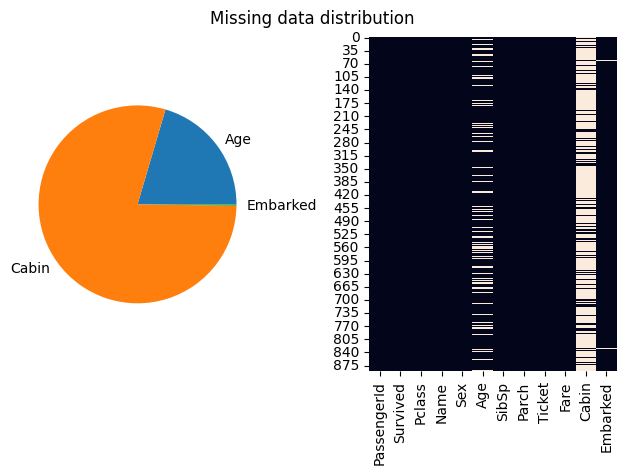

In [55]:
missing_data = titanic_df.isnull().sum()

missing_data = missing_data.where(missing_data > 0).dropna()

heatmap_df_bool = titanic_df.isnull()
heatmp_df = heatmap_df_bool.map(lambda x: int(x))

fig, axs = plt.subplots(1, 2)

sns.heatmap(titanic_df.isnull(), cbar=False).set_title(" ")
 
#wedges, texts, autotexts 
axs[0].pie(missing_data, labels=missing_data.index.to_list())

fig.tight_layout()#spacing between plots
fig.suptitle("Missing data distribution")

Text(0.5, 1.0, 'Correlation between Sex and death rate')

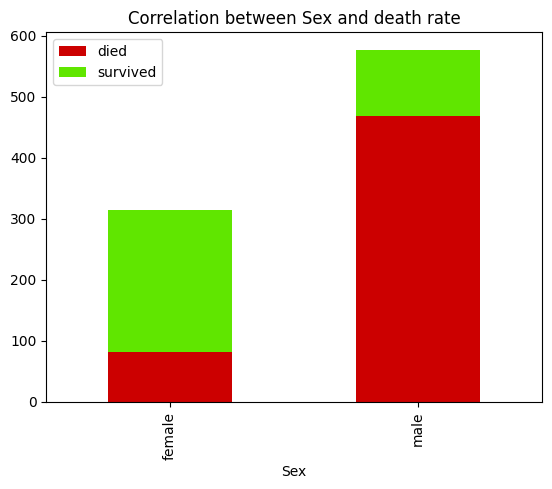

In [221]:
# analyse passenger sex and it's correlations
gender_groups = titanic_df.groupby(['Sex', "Survived"])

combined_group_counts = gender_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between Sex and death rate")

Text(0.5, 1.0, 'Correlation between Age and death rate')

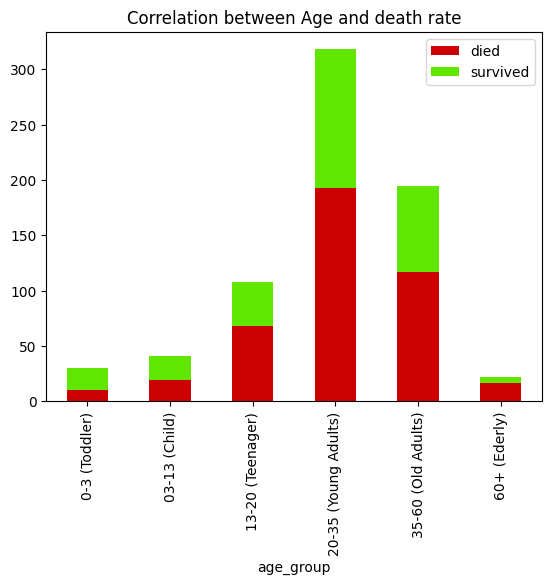

In [189]:
# analyse age and it's correlations
myLocator = mticker.MultipleLocator(5)

age_groups = titanic_df.groupby(['Age', "Survived"])
combined_group_counts = age_groups.count()["PassengerId"].unstack()

combined_group_counts["age_group"] = "" #create new column
combined_group_counts.loc[combined_group_counts.index <= 3 , "age_group"] = "0-3 (Toddler)"
combined_group_counts.loc[combined_group_counts.index > 3, "age_group"] = "03-13 (Child)"
combined_group_counts.loc[combined_group_counts.index > 13, "age_group"] = "13-20 (Teenager)"
combined_group_counts.loc[combined_group_counts.index > 20, "age_group"] = "20-35 (Young Adults)"
combined_group_counts.loc[combined_group_counts.index > 35, "age_group"] = "35-60 (Old Adults)"
combined_group_counts.loc[combined_group_counts.index > 60, "age_group"] = "60+ (Ederly)"
combined_group_counts.loc[combined_group_counts.index > 150, "age_group"] = "Probably_Dead_lol"

groups_survival_rates = combined_group_counts.groupby(["age_group"]).sum()

combined_group_counts.reindex(combined_group_counts["age_group"])
combined_group_counts = age_groups.count()["PassengerId"].unstack()


fig, ax = plt.subplots()

groups_survival_rates.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])

plt.title("Correlation between Age and death rate")

Text(0.5, 1.0, 'Correlation between Class and death rate')

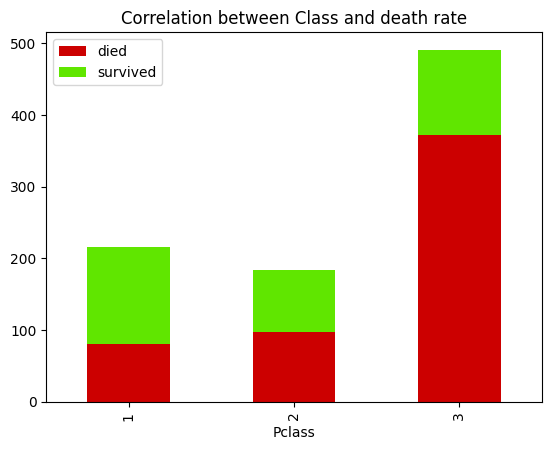

In [200]:
# analyse Passenger class and it's correlations
class_groups = titanic_df.groupby(['Pclass', "Survived"])

combined_group_counts = class_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between Class and death rate")

Text(0.5, 1.0, 'Correlation between city embarked and death rate')

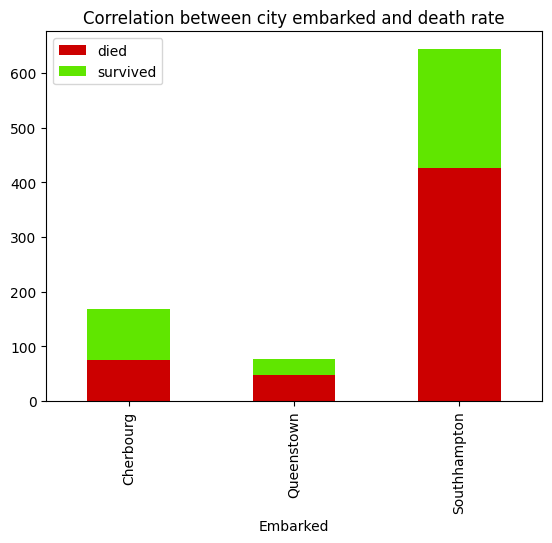

In [40]:
# analyse Passenger embarked and it's correlations
embarked_groups = titanic_df.groupby(['Embarked', "Survived"])

combined_group_counts = embarked_groups.count()["PassengerId"].unstack()
combined_group_counts.rename(index={'C':'Cherbourg'}, inplace=True)
combined_group_counts.rename(index={'Q':'Queenstown'}, inplace=True)
combined_group_counts.rename(index={'S':'Southhampton'}, inplace=True)


fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between city embarked and death rate")

Text(0.5, 1.0, 'Correlation between Class and death rate')

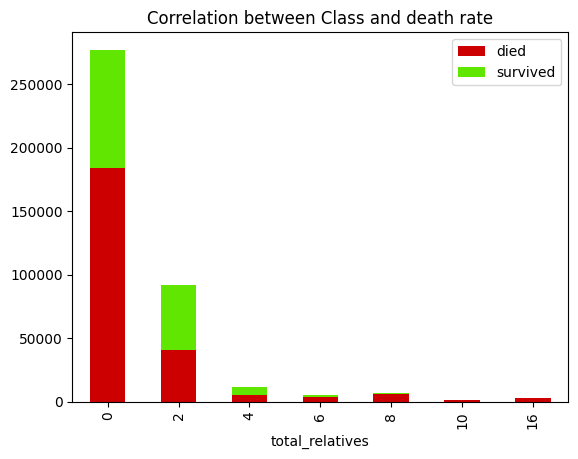

In [59]:
# analyse Passenger class and it's correlations
titanic_df["total_relatives"] = titanic_df["SibSp"] + titanic_df["SibSp"]
relative_groups = titanic_df.groupby(['total_relatives', "Survived"])

combined_group_counts = relative_groups.count()["PassengerId"].unstack()
fig, ax = plt.subplots()
#ax.plot.bar(stacked=True)
combined_group_counts.plot.bar(stacked=True, ax=ax, color=["#cc0000", "#60e600"])
ax.legend(["died","survived"])
plt.title("Correlation between Class and death rate")